<a href="https://colab.research.google.com/github/worldwidekatie/Build_Week_1/blob/master/BW1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Internet Attitudes Qualitative Analysis**


#1. Import libraries. Get and clean dataset.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')

df = pd.read_csv("https://raw.githubusercontent.com/worldwidekatie/Build_Week_1/master/Build_Week_1_Data%20.csv")
df = df.replace({np.NaN: 0, "Spanish": 0, "English": 1})
df = df[['emplnw', 'party_lean', 'Spanish', 'Info', 'Economic', 'Connection', 'Tool']]
df.head()

,emplnw,party_lean,Spanish,Info,Economic,Connection,Tool
0,3,4,0,1.0,0.0,1.0,0.0
1,1,4,0,1.0,0.0,0.0,0.0
2,1,2,0,0.0,0.0,0.0,1.0
3,4,2,0,0.0,1.0,0.0,0.0
4,4,9,0,1.0,0.0,0.0,0.0


#2. Define Functions



In [0]:
#Function for t-tests
def Ttest_loop(df1, df2):
  themes = df1.columns.tolist()
  output=[]

  for theme in themes:
    output.append([theme, df1[theme].mean(), df2[theme].mean(), stats.ttest_ind(df1[theme], df2[theme], nan_policy='omit')])

  output2 = pd.DataFrame([[i[0], i[1], i[2], i[3][0], i[3][1]] for i in output],
                  columns=['theme', 'df1', 'df2', 't-statistic', 'p-value'])

  return output2.sort_values(by=['p-value'])

#3. Run t-test and make graphs
## 3a. Starting with political party

In [3]:
#T-Tests
rep = df[df['party_lean']==1]
dem = df[df['party_lean']==2]

Ttest_loop(rep, dem)

,theme,df1,df2,t-statistic,p-value
1,party_lean,1.000000,2.000000,-inf,0.000000
2,Spanish,0.974239,0.937685,2.767966,0.005736
3,Info,0.658080,0.632047,0.877500,0.380407
6,Tool,0.072600,0.060831,0.769154,0.441967
4,Economic,0.046838,0.050445,-0.269772,0.787387
5,Connection,0.290398,0.287834,0.091394,0.927196
0,emplnw,2.309133,2.324926,-0.078323,0.937585


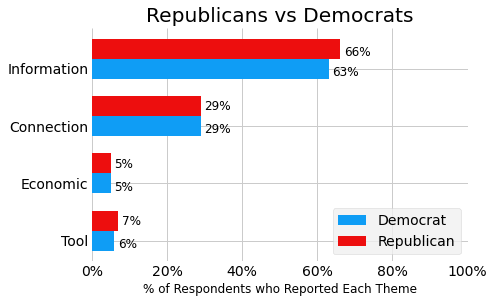

In [4]:
#Graph
rep_means = [7, 5, 29, 66]
dem_means = [6, 5, 29, 63]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, dem_means, 0.35, label='Democrat', color='#0f9df5')
ax.barh(z, rep_means, 0.35, label='Republican', color='#ed0e0e')

ax.set_xlabel('% of Respondents who Reported Each Theme', fontsize=12)
ax.set_title('Republicans vs Democrats')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

#Information Labels
ax.text(s="66%", y=3.05, x=67, fontsize=12)
ax.text(s="63%", y=2.7, x=64, fontsize=12)
#ax.text(s="p-value .4", y=3, x=73, fontsize=12)

#Connection Labels
ax.text(s="29%", y=2.1, x=30, fontsize=12)
ax.text(s="29%", y=1.7, x=30, fontsize=12)
#ax.text(s="p-value .9", y=2, x=38, fontsize=12)

#Economic Labels
ax.text(s="5%", y=1.1, x=6, fontsize=12)
ax.text(s="5%", y=0.7, x=6, fontsize=12)
#ax.text(s="p-value .8", y=1, x=14, fontsize=12)

#Tool Labels
ax.text(s="7%", y=0.1, x=8, fontsize=12)
ax.text(s="6%", y=-0.3, x=7, fontsize=12)
#ax.text(s="p-value .4", y=0, x=16, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## 3b. Employed Full-Time vs Self-Employed

In [5]:
#T-Tests
Employed = df[df['emplnw']==1]
Self_Employed = df[df['emplnw']==5]

Ttest_loop(Employed, Self_Employed)

,theme,df1,df2,t-statistic,p-value
0,emplnw,1.000000,5.000000,-inf,0.000000
2,Spanish,0.933549,1.000000,-1.746851,0.081130
3,Info,0.669368,0.627907,0.556921,0.577771
6,Tool,0.071313,0.093023,-0.529364,0.596731
5,Connection,0.273906,0.302326,-0.402635,0.687348
4,Economic,0.056726,0.069767,-0.354460,0.723108
1,party_lean,2.131280,2.116279,0.060865,0.951485


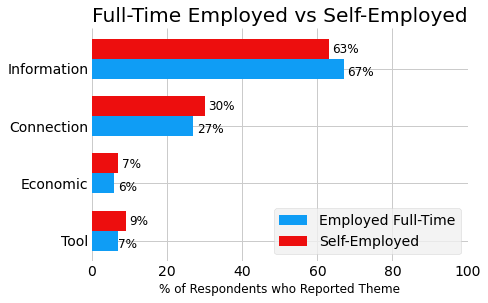

In [6]:
#Chart
employed_means = [7, 6, 27, 67]
self_employed_means = [9, 7, 30, 63]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, employed_means, 0.35, label='Employed Full-Time', color='#0f9df5')
ax.barh(z, self_employed_means, 0.35, label='Self-Employed', color='#ed0e0e')


ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('Full-Time Employed vs Self-Employed')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)

#Information Labels
ax.text(s="63%", y=3.1, x=64, fontsize=12)
ax.text(s="67%", y=2.7, x=68, fontsize=12)
#ax.text(s="p-value .6", y=3, x=74, fontsize=12)

#Connection Labels
ax.text(s="30%", y=2.1, x=31, fontsize=12)
ax.text(s="27%", y=1.7, x=28, fontsize=12)
#ax.text(s="p-value .7", y=2, x=39, fontsize=12)

#Economic Labels
ax.text(s="7%", y=1.1, x=8, fontsize=12)
ax.text(s="6%", y=0.7, x=7, fontsize=12)
#ax.text(s="p-value .7", y=1, x=14, fontsize=12)

#Tool Labels
ax.text(s="9%", y=0.1, x=10, fontsize=12)
ax.text(s="7%", y=-0.3, x=7, fontsize=12)
#ax.text(s="p-value .6", y=0, x=16, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

##3c. Spanish and English

In [7]:
#T-Tests
Spanish = df[df['Spanish']==0]
English = df[df['Spanish']==1]

Ttest_loop(Spanish, English)

,theme,df1,df2,t-statistic,p-value
2,Spanish,0.000000,1.000000,-inf,0.000000
4,Economic,0.129412,0.039612,3.866309,0.000116
3,Info,0.447059,0.645918,-3.695966,0.000228
1,party_lean,2.705882,2.076799,3.633301,0.000291
6,Tool,0.129412,0.069523,2.050042,0.040558
5,Connection,0.352941,0.295877,1.110692,0.266903
0,emplnw,2.247059,3.084074,-0.837226,0.402617


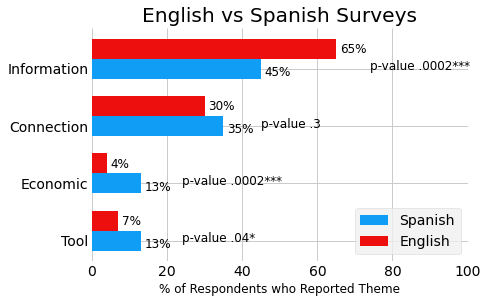

In [8]:
spanish_means = [13, 13, 35, 45]
english_means = [7, 4, 30, 65]
labels = ['Tool', 'Economic', 'Connection', 'Information']
x = np.array([-0.175,  0.825,  1.825,  2.825])
z = np.array([0.175, 1.175, 2.175, 3.175])

fig, ax = plt.subplots()
ax.barh(x, spanish_means, 0.35, label='Spanish', color='#0f9df5')
ax.barh(z, english_means, 0.35, label='English', color='#ed0e0e')


ax.set_xlabel('% of Respondents who Reported Theme', fontsize=12)
ax.set_title('English vs Spanish Surveys')
ax.set_yticks(x)
ax.set_ylim(-0.535, 3.535)
ax.set_yticklabels(labels)
ax.legend(loc='lower right')
ax.set_xlim(0, 100)

#Information Labels
ax.text(s="65%", y=3.1, x=66, fontsize=12)
ax.text(s="45%", y=2.7, x=46, fontsize=12)
ax.text(s="p-value .0002***", y=2.8, x=74, fontsize=12)

#Connection Labels
ax.text(s="30%", y=2.1, x=31, fontsize=12)
ax.text(s="35%", y=1.7, x=36, fontsize=12)
ax.text(s="p-value .3", y=1.8, x=45, fontsize=12)

#Economic Labels
ax.text(s="4%", y=1.1, x=5, fontsize=12)
ax.text(s="13%", y=0.7, x=14, fontsize=12)
ax.text(s="p-value .0002***", y=0.8, x=24, fontsize=12)

#Tool Labels
ax.text(s="7%", y=0.1, x=8, fontsize=12)
ax.text(s="13%", y=-0.3, x=14, fontsize=12)
ax.text(s="p-value .04*", y=-0.2, x=24, fontsize=12)

# Set Figure background color
fig.set_facecolor(color="None")

# Set the Axes background color
ax.set_facecolor(color="None")

# Turn off the spine
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()